In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib.numpy_pickle as joblib
import torch
import torch.nn as nn
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import seperate_spec_and_features
import prediction_results
###

True
Using device: cuda


In [2]:
#load specs and features for both the shank3 and pups dataset

#### SHANK3
usvs_shank3 = joblib.load('shank3USVs_many_properties.jl')
features_shank3 = joblib.load('shank3USVs_hardcoded_features')
emitter_library_shank3 = joblib.load('emitter_library_shank3')
emitter_library_shank3_individual = joblib.load('emitter_library_shank3_individual')

#### PUPS
usvs_pups = joblib.load('emitter_and_specs.jl')
features_pups = joblib.load('pups_hardcoded_features')
emitter_library_pups_individual = joblib.load('emitter_library_pups_individual')

In [3]:
#seperate specs and emitter for both datasets

#### SHANK3
spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path= seperate_spec_and_features.separate_spec_and_features(usvs_shank3)
spec_shank3 = spec
emitter_shank3 = emitter

#### PUPS
spec, emitter = seperate_spec_and_features.seperate_spec_and_emitter_pups(usvs_pups)
spec_pups = spec
emitter_pups = emitter

del spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path

In [4]:
### MAKE SURE SPEC AND EMITTERS AND FEATURES ARE ALL OF THE SAME SIZE
assert len(spec_shank3) == len(emitter_shank3) == len(features_shank3), "The lengths of the lists are not equal."
assert len(spec_pups) == len(emitter_pups) == len(features_pups), "The lengths of the lists are not equal."

In [ ]:
features_shank3 = features_shank3.get()
features_pups = features_pups.get()
features_shank3 = features_shank3.squeeze()
features_pups = features_pups.squeeze()

(50473, 15)


In [6]:
#### give the folder in which the models are saved for making predictions

#figure in thesis right now are made on oversampled models

#### SHANK3 trained with labels 0 and 1 for WT
# path_to_model_shank3 = 'Shank3_24_final'
path_to_model_shank3 = 'final_models/Shank3_8_v0'

#### PUPS trained with label numbers for each individual emitter
path_to_model_pups = 'final_models/pups_8_v0'

#BELOW 4 PREDICTION FIGURES FOR THE SHANK3 DATASET WILL BE MADE: strain_prediction_model, strain_prediction_hardcoded, emitter_prediction_model and
# emitter_prediction_hardcoded

#THERE WILL ALSO BE 2 PREDICTION FIGURES FOR THE PUPS DATASET: emitter_prediction_model_pups and emitter_prediction_hardcoded_pups

# FOR ALL FIGURES FEMALE SPECTROGRAMS WILL BE REMOVED AND THERE WILL BE 6 SEPERATE FUNCTIONS FOR EACH FIGURE IN prediction_results.py


indices before removal of doubles = 31202


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:1217: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train = torch.load(pat

indices after removal of doubles = 31202
Weight WT = 3.6620646720621085e-05
Weight KO = 0.00025673940949935817
True


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:1300: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe

train latent shape: (31202, 8)
test latent shape: (6687, 8)
Train latent shape after umap = (31202, 8)
Test latent shape after umap = (6687, 8)
Indices shape:  (6687, 30)
Distances shape:  (6687, 30)
Labels nearest neighbours shape:  (6687, 30)
Overall accuracy:  0.5157768805144309
[0.49663526 0.48168087 0.48003589 0.47839091 0.47211006 0.47540003
 0.47913863 0.49125168 0.47300733 0.48631673 0.4797368  0.49080305
 0.48153133 0.4848213  0.48631673 0.47181098 0.47405413 0.47315687
 0.47614775 0.48796172 0.4797368  0.47240915 0.4933453  0.48437266
 0.47540003 0.47943771 0.47614775 0.48631673 0.48153133 0.47824136
 0.47943771 0.46896964 0.47839091 0.47913863 0.48197996 0.48003589
 0.48811126 0.45476297 0.48272768 0.47315687 0.48855989 0.49902796
 0.47764319 0.49050396 0.49244803 0.47405413 0.47749364 0.48377449
 0.48467175 0.48392403 0.4810827  0.48736354 0.47824136 0.487214
 0.47794228 0.48841035 0.48676537 0.48407358 0.47883954 0.47240915
 0.48855989 0.46971736 0.47854045 0.48302677 0.47

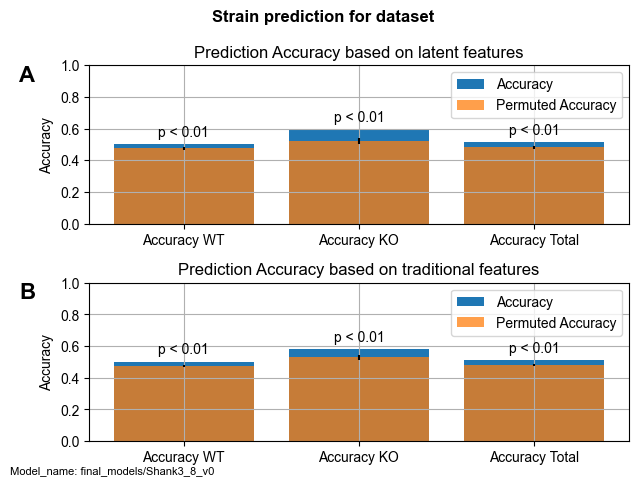

In [7]:
prediction_results.strain_prediction_model_weighted_and_hardcoded(spec_shank3,features_shank3, emitter_shank3,emitter_library_shank3,path_to_model_shank3, n_neighbours = 30, n_permutations =100)

c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:2162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train = torch.load(pat

indices before removal of doubles = 12877
indices after removal of doubles = 12877
The same labels are present in both labels_train and labels_test.
{0: 0.0014577259475218659, 1: 0.0006711409395973154, 2: 0.00048567265662943174, 3: 0.001199040767386091, 4: 0.0026455026455026454, 5: 0.0009407337723424271, 8: 0.0012547051442910915, 9: 0.0008756567425569177, 10: 0.0006369426751592356, 12: 0.0008019246190858059, 13: 0.0010548523206751054, 14: 0.0015082956259426848}
True


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:2253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe

train latent shape: (12877, 8)
test latent shape: (2761, 8)
Indices shape:  (2761, 30)
Distances shape:  (2761, 30)
Labels nearest neighbours shape:  (2761, 30)
Overall accuracy:  0.2202100688156465
Accuracy per class:  {0: 0.09655172413793103, 1: 0.09900990099009901, 2: 0.21231422505307856, 3: 0.13609467455621302, 4: 0.19117647058823528, 5: 0.29545454545454547, 8: 0.15483870967741936, 9: 0.26359832635983266, 10: 0.19760479041916168, 12: 0.4701492537313433, 13: 0.22885572139303484, 14: 0.20212765957446807}
Mean permuted accuracy:  0.07012676566461426
Std permuted accuracy:  0.0051363720356411395
Mean permuted accuracies per class:  {0: 0.10393103448275863, 1: 0.05448844884488449, 2: 0.03734607218683652, 3: 0.09431952662721893, 4: 0.1686764705882353, 5: 0.07154545454545454, 8: 0.09896774193548388, 9: 0.06757322175732218, 10: 0.04979041916167665, 12: 0.0666044776119403, 13: 0.07492537313432837, 14: 0.10781914893617021}
Std permuted accuracies per class:  {0: 0.02289935587315656, 1: 0.012

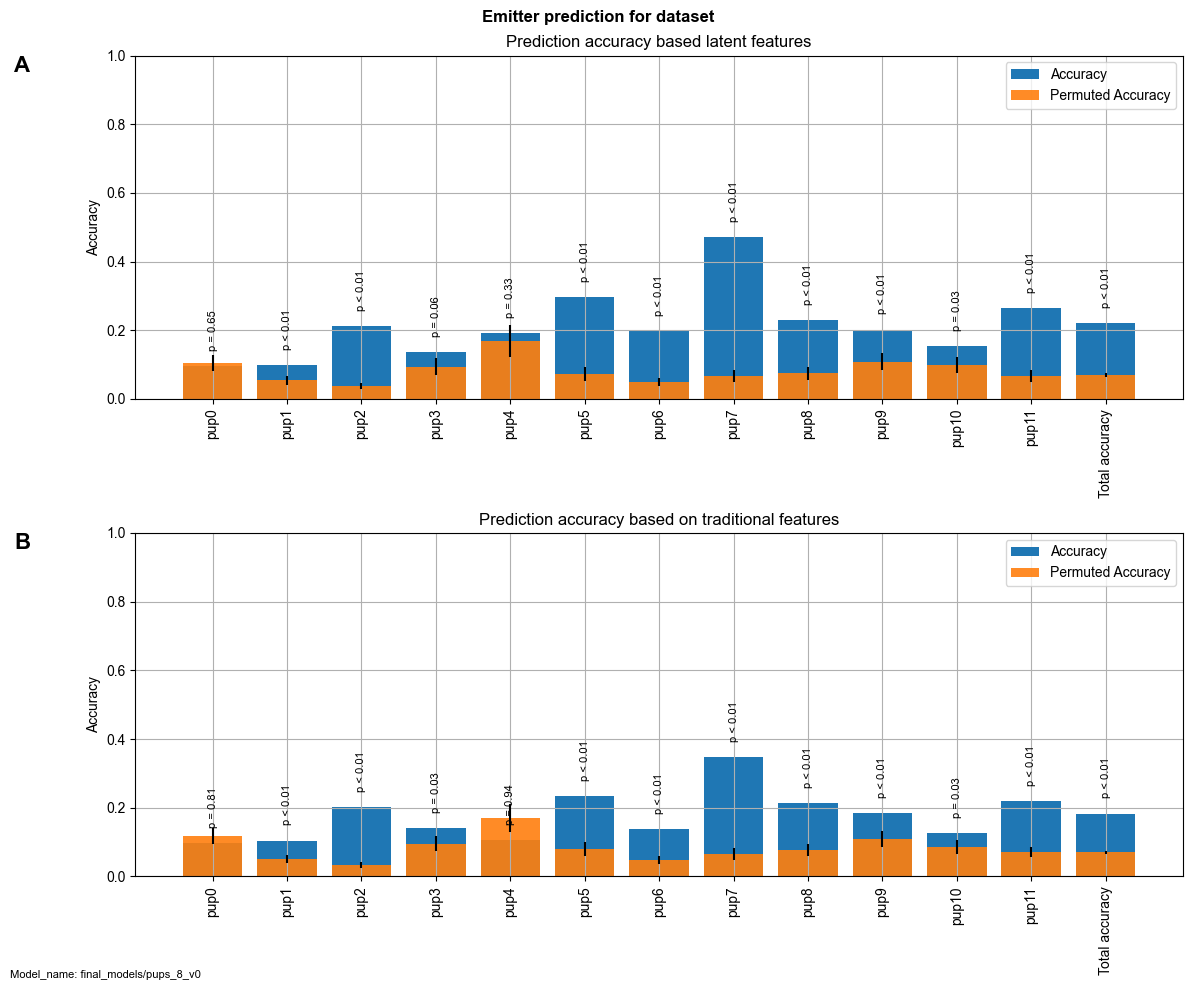

In [8]:
prediction_results.emitter_prediction_model_weighted_and_hardcoded_pups(spec_pups,features_pups, emitter_pups, emitter_library_pups_individual, path_to_model_pups, n_neighbours = 30, n_permutations =100)

c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:751: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train = torch.load(path

indices before removal of doubles = 31202
indices after removal of doubles = 31202
The same labels are present in both labels_train and labels_test.
{0: 0.0008992805755395684, 2: 0.0002961208172934557, 3: 0.0007473841554559044, 5: 0.02, 9: 0.0136986301369863, 10: 0.00018768768768768769, 12: 0.008771929824561403, 13: 0.001557632398753894, 14: 0.002457002457002457, 15: 0.0049504950495049506, 16: 0.0010706638115631692, 17: 0.0005750431282346176, 18: 0.0005047955577990914, 19: 0.001594896331738437, 20: 0.00025348542458808617, 21: 0.00039984006397441024, 22: 0.011235955056179775, 24: 0.017241379310344827, 25: 0.00039077764751856197, 26: 0.01818181818181818, 27: 0.0012165450121654502, 31: 0.05555555555555555, 32: 0.05555555555555555, 33: 0.0011248593925759281, 34: 0.022222222222222223, 35: 0.047619047619047616, 36: 0.043478260869565216, 37: 0.0004633920296570899, 38: 0.012987012987012988}
True


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:842: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_

train latent shape: (31202, 8)
test latent shape: (6687, 8)
Indices shape:  (6687, 30)
Distances shape:  (6687, 30)
Labels nearest neighbours shape:  (6687, 30)
Overall accuracy:  0.06520113653357261
Accuracy per class:  {0: 0.0916030534351145, 2: 0.00980392156862745, 3: 0.1948529411764706, 5: 0.07692307692307693, 9: 0.09090909090909091, 10: 0.07571801566579635, 12: 0.03125, 13: 0.17197452229299362, 14: 0.22772277227722773, 15: 0.027777777777777776, 16: 0.05687203791469194, 17: 0.056451612903225805, 18: 0.014218009478672985, 19: 0.08888888888888889, 20: 0.02286401925391095, 21: 0.09499136442141623, 22: 0.0, 24: 0.09090909090909091, 25: 0.03710575139146568, 26: 0.1111111111111111, 27: 0.04864864864864865, 31: 0.0, 32: 0.0, 33: 0.02976190476190476, 34: 0.2, 35: 0.0, 36: 0.5, 37: 0.10697674418604651, 38: 0.0}
Mean permuted accuracy:  0.017575893524749513
Std permuted accuracy:  0.0017307668833299993
Mean permuted accuracies per class:  {0: 0.03393129770992367, 2: 0.008025210084033613, 3: 

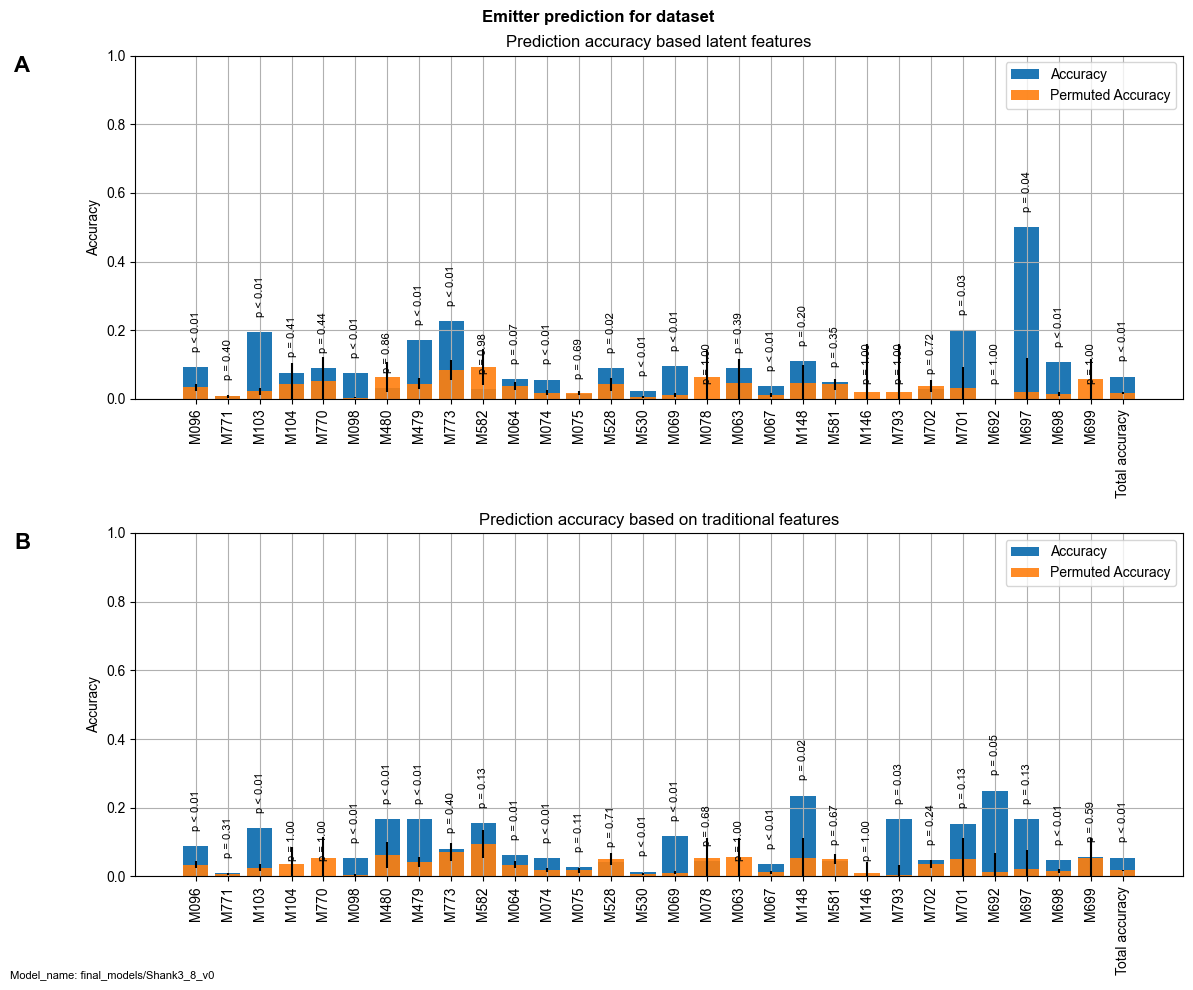

In [9]:
prediction_results.emitter_prediction_model_weighted_and_hardcoded(spec_shank3,features_shank3, emitter_shank3, emitter_library_shank3_individual, path_to_model_shank3, n_neighbours = 30, n_permutations =100)

features shape = (50473, 15)
features shape = (18547, 15)
indices1 before removal of doubles = 31202
indices2 before removal of doubles = 12877


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train1 = torch.load(path

indices1 after removal of doubles = 31202
indices2 after removal of doubles = 12877
True
True


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_

train latent shape: (31202, 8)
test latent shape: (6687, 8)
Indices shape:  (6687, 5)
Distances shape:  (6687, 5)
Features nearest neighbours shape:  (6687, 5, 15)
Total RMSE:  5374.932981365262
RMSE per feature:  [2.86688251e-03 3.55478630e+03 7.53785873e+03 9.38641197e+03
 1.18973435e+04 8.76711688e+03 7.01785727e+03 8.53140802e+02
 6.28954539e-02 5.86712506e-01 2.72042730e+03 9.20923068e-01
 9.24786218e-01 6.19994839e-01 6.23482457e-01]


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_

train latent shape: (12877, 8)
test latent shape: (2761, 8)
Indices shape:  (2761, 5)
Distances shape:  (2761, 5)
Features nearest neighbours shape:  (2761, 5, 15)
Total RMSE:  5309.300871739715
RMSE per feature:  [3.11054876e-03 2.38485121e+03 4.38626706e+03 1.05065944e+04
 1.14087504e+04 7.10852450e+03 1.01693202e+04 6.79522656e+02
 5.29696437e-02 8.11139323e-01 1.71674766e+03 5.08115951e-01
 4.56987285e-01 4.54571532e-01 4.20327395e-01]


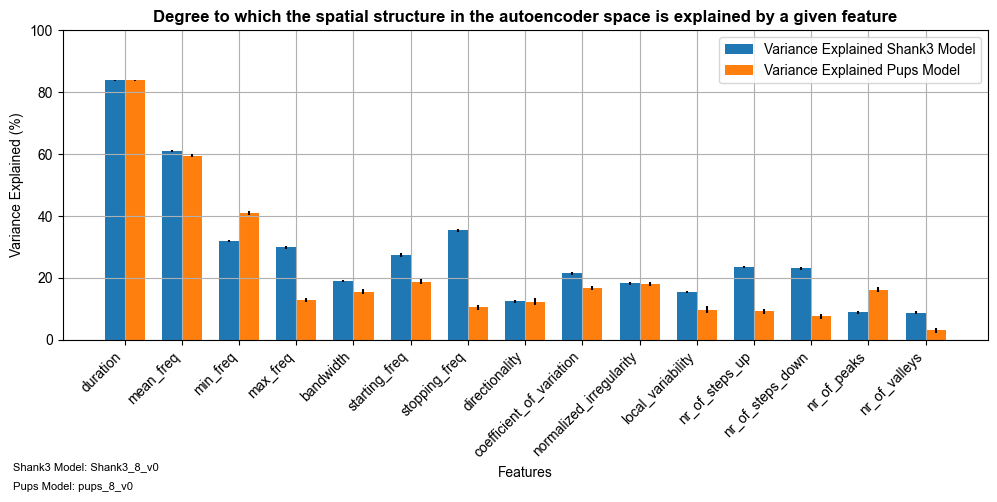

In [10]:
prediction_results.get_explained_variance_features_across_2_models(spec_shank3,spec_pups, path_to_model_shank3, path_to_model_pups, features_shank3, features_pups, n_neighbours = 5, n_permutations =100, remove_double_specs = True)